## Import modules

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pybasic

## Declare image directory paths

In [2]:
path_to_demo_examples = 'path/to/demoexamples/'
path_to_demo_examples = '/Users/lorenz.lamm/PhD_projects/BaSiC/Demoexamples/' #example
wsi_path = os.path.join(path_to_demo_examples, 'WSI_Brain/Uncorrected_tiles')

## Import image sequence

In [3]:
D = pybasic.tools.load_data(wsi_path, '.tif', working_size=(128, 128), interpolation_method='bilinear')

Loading image sequence...
0 / 63
10 / 63
20 / 63
30 / 63
40 / 63
50 / 63
60 / 63


## Run BaSiC

In [4]:
flatfield, darkfield = pybasic.basic(D, segmentation=None, darkfield=True)

Reweighting Iteration 1
Iteration 1  |W|_0  1 |E1|_0 0  stopCriterion 0.7038591903216144 B1_offset 0.0
Iteration 2  |W|_0  1 |E1|_0 0  stopCriterion 0.25438056909752044 B1_offset 0.0
Iteration 3  |W|_0  4 |E1|_0 0  stopCriterion 0.22881252380638192 B1_offset 0.21879631549794992
Iteration 4  |W|_0  4 |E1|_0 78  stopCriterion 0.16222452173263643 B1_offset 0.21879631549794992
Iteration 5  |W|_0  7 |E1|_0 158  stopCriterion 0.13204983079544844 B1_offset 0.21911615672015333
Iteration 6  |W|_0  12 |E1|_0 221  stopCriterion 0.11454503015072699 B1_offset 0.21933799805582913
Iteration 7  |W|_0  12 |E1|_0 270  stopCriterion 0.10877219332468822 B1_offset 0.21950682849819908
Iteration 8  |W|_0  17 |E1|_0 315  stopCriterion 0.1057201514765768 B1_offset 0.2198530106137255
Iteration 9  |W|_0  25 |E1|_0 392  stopCriterion 0.10302749405458134 B1_offset 0.22037760124761183
Iteration 10  |W|_0  38 |E1|_0 1796  stopCriterion 0.09872585910246658 B1_offset 0.22066692488744705
Iteration 11  |W|_0  54 |E1|_0 

Iteration 11  |W|_0  46 |E1|_0 37235  stopCriterion 0.04219568667301196 B1_offset 0.22099343477923877
Iteration 12  |W|_0  57 |E1|_0 44835  stopCriterion 0.03639258934059035 B1_offset 0.22067962910094185
Iteration 13  |W|_0  74 |E1|_0 58012  stopCriterion 0.030922544636939713 B1_offset 0.22044273805584103
Iteration 14  |W|_0  104 |E1|_0 79323  stopCriterion 0.025411389149579144 B1_offset 0.2202720151268381
Iteration 15  |W|_0  133 |E1|_0 111687  stopCriterion 0.020179077489735166 B1_offset 0.2201883806084975
Iteration 16  |W|_0  173 |E1|_0 156810  stopCriterion 0.015250421727507235 B1_offset 0.22017478611939617
Iteration 17  |W|_0  204 |E1|_0 210142  stopCriterion 0.01092271889256817 B1_offset 0.2201845770427781
Iteration 18  |W|_0  235 |E1|_0 265185  stopCriterion 0.0074538244005273 B1_offset 0.22020239743115444
Iteration 19  |W|_0  249 |E1|_0 316565  stopCriterion 0.004964959549904529 B1_offset 0.2202309129978198
Iteration 20  |W|_0  256 |E1|_0 363298  stopCriterion 0.003316342450866

## Show output flatfield and darkfield components

Flatfield:


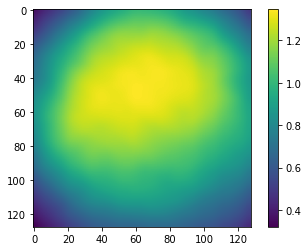

Darkfield:


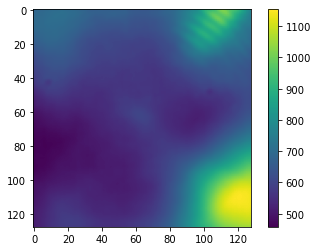

In [5]:
print('Flatfield:')
plt.imshow(flatfield)
plt.colorbar()
plt.show()
print('Darkfield:')
plt.imshow(darkfield)
plt.colorbar()
plt.show()

## Correct image stack

In [6]:
D_corrected = np.transpose(D, (2,0,1))
D_corrected = np.array(D_corrected, dtype=np.float64)
D_corrected -= darkfield
D_corrected /= flatfield
D_corrected = np.transpose(D_corrected, (1,2,0))

# Show comparison between corrected and non-corrected images

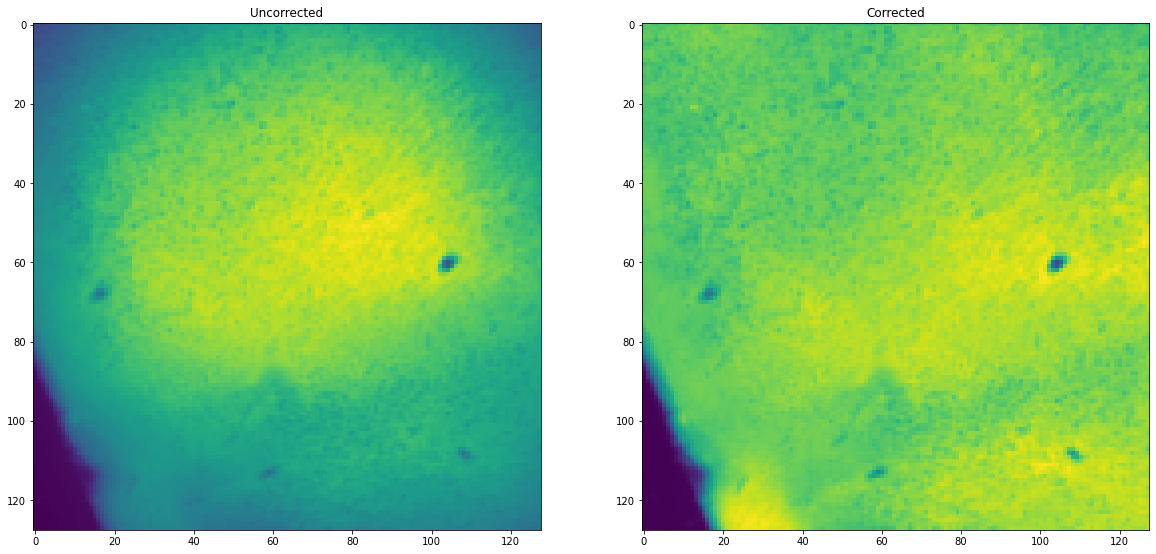

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(D[:,:,5])
plt.title('Uncorrected')
plt.subplot(1,2,2)
plt.imshow(D_corrected[:,:,5])
plt.title('Corrected')
plt.show()